In [47]:
%cd ..

f:\


C:\Users\ngtdu\AppData\Roaming\Python\Python39\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [48]:
import numpy as np
import os
import ot
import torch
from sklearn.cluster import KMeans
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

from optimal_transport.models import KeypointFOT

import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import ot.plot
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [49]:
def get_data(num=20):
    np.random.seed(3)
    source = []
    target = []
    centers = [np.array([[-1,-1]]),np.array([[-3,2]]),np.array([[-2,3]]),
               np.array([[0,1]]),np.array([[-0.5,0.5]]),np.array([[-1,2]])]
    for i in range(3):
        source.append(np.random.multivariate_normal(np.array([0,0]),cov=0.05*np.array([[1,0],[0,1]]),size=num)+centers[i])
        target.append(
            np.random.multivariate_normal(np.array([0, 0]), cov=0.05 * np.array([[1, 0], [0, 1]]), size=num) + centers[
                i+3])
    return source,target

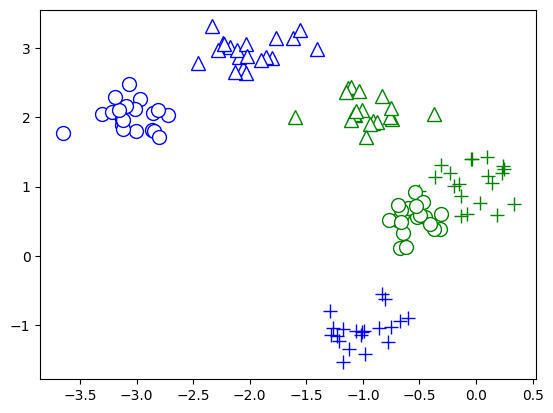

In [50]:
num = 20
source_,target_ = get_data(num)
s = ["+","o","^"]
# plot data
for i in range(3):
    plt.plot(source_[i][:,0], source_[i][:,1], 'b{}'.format(s[i]), markersize=10, markerfacecolor="white")
    plt.plot(target_[i][:,0], target_[i][:,1], 'g{}'.format(s[i]), markersize=10, markerfacecolor="white")

In [51]:
source = np.vstack(source_)
# print(source)
target = np.vstack(target_)

# plt.xticks([])
# plt.yticks([])
# plt.tight_layout()

n_anchors = 3
p = np.ones(len(source))/len(source)
q = np.ones(len(target))/len(target)

I = [3, num+1, 2*num+6]
J = [8, num+1, 2*num+13]
K = list(zip(I, J))

model = KeypointFOT(n_free_anchors=4*n_anchors, guide_mixing=0.5, stop_thr=1e-5,
                               sinkhorn_reg=0.005, temperature=0.1, div_term=1e-10, max_iters=200)

result = model.fit(source, target, p, q, K)
# keypoints = result._init_keypoint_inds(K)
# print(keypoints)
# anchors = result._init_anchors(source, 4*n_anchors + len(K))
# print(anchors)
Px = result.Pa_
print(Px)
Py = result.Pb_
print(Py)
P = Px.dot(Py)

# Px = Px.detach().numpy()
# Py = Py.detach().numpy()

# ot.plot.plot2D_samples_mat(source, M, Px, c="grey", alpha=0.5)
# ot.plot.plot2D_samples_mat(M, target, Py, c="grey", alpha=0.5)

# s = ["+","o","^","o","+","^"]
# for i in range(3):
#     plt.plot(source_[i][:,0], source_[i][:,1], 'b{}'.format(s[i]), markersize=10, markerfacecolor="white")
#     plt.plot(target_[i][:,0], target_[i][:,1], 'g{}'.format(s[i]), markersize=10, markerfacecolor="white")
# # plot anchors
# for i in range(n_anchors):
#     if i not in K:
#         plt.plot(M[i][0], M[i][1],'r*', markersize=10+i, markerfacecolor="white")
# # plot keypoints
# t = 3
# for i in range(len(I)):
#     plt.plot(np.vstack(source)[I[i]][0], np.vstack(source)[I[i]][1],'r{}'.format(s[i]), markersize=10+t, markerfacecolor="white")
#     plt.plot(np.vstack(target)[J[i]][0], np.vstack(target)[J[i]][1],'r{}'.format(s[i]), markersize=10+t, markerfacecolor="white")
#     plt.plot(np.vstack(M)[K[i]][0], np.vstack(M)[K[i]][1],'r{}'.format(s[i]), markersize=10+t, markerfacecolor="white")

# if not os.path.exists("figure"):
#     os.makedirs("figure")
# pl.title('Factored OT with template samples')

labels = [0]*num + [1]*num + [2]*num
labels = np.array(labels)
pred = np.argmax(P,axis=1)
pred = labels[pred]
acc = np.mean(labels==pred)
print("Matching accuracy:{:.1f}%".format(acc*100))

# plt.text(-3.8,-0.5,"Matching\naccuracy: {:.1f}%".format(acc*100),fontsize=22)
# plt.savefig("figure/KP.pdf")
# plt.show()


c:\Users\ngtdu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[0.00000000e+000 0.00000000e+000 0.00000000e+000 5.18360603e-079
  2.65343112e-082 3.38262167e-078 2.18803384e-003 4.64625425e-089
  3.94901606e-003 6.66790951e-089 9.64922682e-088 6.05244593e-089
  3.94901839e-003 5.18330459e-079 3.94901943e-003]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 3.05549785e-088
  1.00899957e-091 2.59538928e-087 1.38077741e-004 9.11732237e-099
  4.63234684e-003 1.25347417e-098 1.57220500e-097 1.62043174e-098
  4.63233436e-003 3.05530340e-088 4.63232877e-003]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 2.92416507e-078
  1.33047554e-081 1.95204596e-077 2.77968794e-003 9.81483441e-089
  3.75179710e-003 1.46739817e-088 2.58919864e-087 1.03931736e-088
  3.75180057e-003 2.92399268e-078 3.75180212e-003]
 [6.66666667e-002 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.